# Reinhart-Rogoff replication

* Replication of Reinhart-Rogoff "Growth in a Time of Debt."
* Python port of R code by Thomas Herndon | Michael Ash | Robert Pollin
* https://scholar.harvard.edu/files/rogoff/files/growth_in_time_debt_aer.pdf
* Author: Vincent Arel-Bundock varel@umich.edu
* Data: https://gist.github.com/vincentarelbundock/5409893/raw/a623f2f3bae027a0e51dd01ac5b70d44d909a7b9/RR-processed.csv

**Autores:** Carmen M. Reinhart y Kenneth S. Rogoff  
**Fuente:** American Economic Review, 2010

## Introducción
- El estudio analiza la relación entre el nivel de deuda pública y el crecimiento económico en países avanzados y emergentes.
- Se utiliza una base de datos histórica que abarca más de 200 años y múltiples países.

## Metodología
- Se recopilan datos sobre deuda pública y tasas de crecimiento del PIB.
- Los países se agrupan por rangos de deuda respecto al PIB:  
  - Menos de 30%
  - 30-60%
  - 60-90%
  - Más de 90%
- Se compara el crecimiento medio en cada rango de deuda.

## Resultados Principales
- **Baja deuda (<60% del PIB):** No se observa una relación significativa entre deuda y crecimiento.
- **Alta deuda (>90% del PIB):** El crecimiento medio es considerablemente menor; cae alrededor de 1 punto porcentual respecto a niveles más bajos de deuda.
- El efecto es consistente en países avanzados y emergentes, aunque es más pronunciado en los primeros.

## Implicaciones
- Los resultados sugieren que altos niveles de deuda pueden afectar negativamente el crecimiento económico.
- El umbral del 90% del PIB es relevante para las políticas fiscales.

## Limitaciones
- El análisis es correlacional; no se prueba causalidad directa.
- Se reconoce que otros factores pueden incidir en la relación entre deuda y crecimiento (por ejemplo, recesiones, políticas monetarias).

## Conclusión
- Mantener la deuda pública por debajo de ciertos niveles puede ser importante para sostener el crecimiento económico.
- El estudio invita a profundizar en los mecanismos causales y en casos específicos.

## Referencia
- Reinhart, C. M., & Rogoff, K. S. (2010). Growth in a Time of Debt. American Economic Review, 100(2), 573-578.

In [24]:
import statsmodels.api as sm
import patsy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

RR = pd.read_csv('RR-processed.csv')

## Number of observations per country

In [25]:
RR.groupby('Country').size()

Country
Australia      64
Austria        62
Belgium        63
Canada         64
Denmark        56
Finland        64
France         54
Germany        59
Greece         40
Ireland        63
Italy          59
Japan          54
Netherlands    53
New Zealand    64
Norway         64
Portugal       58
Spain          42
Sweden         64
UK             64
US             64
dtype: int64

## Bins

In [46]:
bins = ["0-30%","30-60%","60-90%","Above 90%"]
RR['dgcat'] = np.digitize(RR.debtgdp, [0,30,60,90,np.inf]) - 1
RR.dgcat = [bins[x] for x in RR.dgcat]

bins = ["0-30%","30-60%","60-90%","90-120%","Above 120%"]
RR['dgcat2'] = np.digitize(RR.debtgdp, [0,30,60,90,120,np.inf]) - 1
RR.dgcat2 = [bins[x] for x in RR.dgcat2]

## Regression analysis

In [47]:
y,X = patsy.dmatrices('dRGDP ~ dgcat', data=RR[['dRGDP', 'dgcat']].dropna())
print (sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  dRGDP   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     18.36
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           1.22e-11
Time:                        17:42:33   Log-Likelihood:                -2927.9
No. Observations:                1175   AIC:                             5864.
Df Residuals:                    1171   BIC:                             5884.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.1735      0

In [48]:
y2,X2 = patsy.dmatrices('dRGDP ~ dgcat2', data=RR[['dRGDP', 'dgcat2']].dropna())
print (sm.OLS(y2,X2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  dRGDP   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     14.24
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           2.36e-11
Time:                        17:42:40   Log-Likelihood:                -2926.9
No. Observations:                1175   AIC:                             5864.
Df Residuals:                    1170   BIC:                             5889.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.1735 

## Table 3 Corrected

In [49]:
## Country-Year average by debtgdp ("correct weights")
RR.dRGDP.groupby(RR.dgcat).mean()

dgcat
0-30%        4.173523
30-60%       3.092145
60-90%       3.186575
Above 90%    2.167972
Name: dRGDP, dtype: float64

In [51]:
## Averaged Country averages by debtgdp ("equal weights")
RR.dRGDP.groupby([RR.Country, RR.dgcat]).mean().unstack()

dgcat,0-30%,30-60%,60-90%,Above 90%
Country,,,,
Australia,3.205885,4.947205,4.042175,3.774250
Austria,5.207527,3.256526,-3.824000,NaN
Belgium,NaN,4.191655,3.079868,2.566828
Canada,2.515704,3.525446,4.523574,2.956640
Denmark,3.518584,1.700034,2.391147,NaN
Finland,3.817029,2.418535,5.488887,NaN
France,5.058476,2.616159,3.019631,NaN
Germany,3.873759,0.875803,NaN,NaN
Greece,4.001282,0.340200,2.696000,2.910632


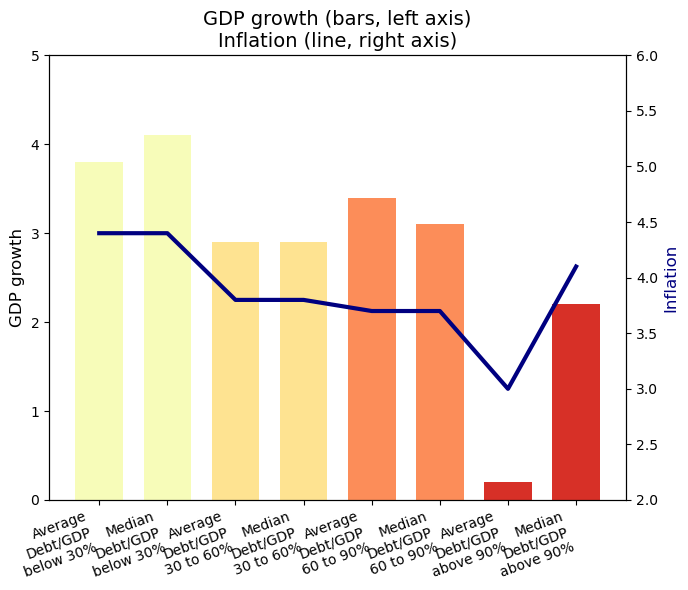

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Datos (aproximados del gráfico original)
labels = [
    "Average\nDebt/GDP\nbelow 30%", "Median\nDebt/GDP\nbelow 30%",
    "Average\nDebt/GDP\n30 to 60%", "Median\nDebt/GDP\n30 to 60%",
    "Average\nDebt/GDP\n60 to 90%", "Median\nDebt/GDP\n60 to 90%",
    "Average\nDebt/GDP\nabove 90%", "Median\nDebt/GDP\nabove 90%"
]
gdp_growth = [3.8, 4.1, 2.9, 2.9, 3.4, 3.1, 0.2, 2.2]     # barras
inflation = [4.4, 4.4, 3.8, 3.8, 3.7, 3.7, 3, 4.1]      # línea

colors = ['#f7fcb9', '#f7fcb9', '#fee391', '#fee391', '#fc8d59', '#fc8d59', '#d73027', '#d73027']

x = np.arange(len(labels))

fig, ax1 = plt.subplots(figsize=(7, 6))

# Barras de crecimiento del PIB
bars = ax1.bar(x, gdp_growth, color=colors, width=0.7)
ax1.set_ylabel('GDP growth', fontsize=12)
ax1.set_ylim(0, 5)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=20, ha='right')
ax1.set_title('GDP growth (bars, left axis)\nInflation (line, right axis)', fontsize=14)

# Segunda escala para inflación
ax2 = ax1.twinx()
ax2.plot(x, inflation, color='navy', linewidth=3)
ax2.set_ylabel('Inflation', fontsize=12, color='navy')
ax2.set_ylim(2, 6)

plt.tight_layout()
plt.show()

In [52]:
# Paso 1: Calcular rango de año por país
year_range = RR.groupby('Country').agg(
    start_year=('Year', 'min'),
    end_year=('Year', 'max')
).reset_index()
year_range['year_range'] = year_range['start_year'].astype(str) + '-' + year_range['end_year'].astype(str)

# Paso 2: Agrupar y calcular la media como ya hacías
grouped = RR.dRGDP.groupby([RR.Country, RR.dgcat]).mean().unstack()

# Paso 3: Unir el rango de año a la tabla agrupada
# Asegúrate de tener el índice Country en grouped
grouped = grouped.reset_index()
grouped = pd.merge(grouped, year_range[['Country', 'year_range']], on='Country', how='left')

# Paso 4: Si quieres la columna 'year_range' justo después de 'Country'
cols = grouped.columns.tolist()
cols.insert(1, cols.pop(cols.index('year_range')))
grouped = grouped[cols]

print(grouped)

        Country year_range     0-30%    30-60%     60-90%  Above 90%
0     Australia  1946-2009  3.205885  4.947205   4.042175   3.774250
1       Austria  1948-2009  5.207527  3.256526  -3.824000        NaN
2       Belgium  1947-2009       NaN  4.191655   3.079868   2.566828
3        Canada  1946-2009  2.515704  3.525446   4.523574   2.956640
4       Denmark  1950-2009  3.518584  1.700034   2.391147        NaN
5       Finland  1946-2009  3.817029  2.418535   5.488887        NaN
6        France  1950-2009  5.058476  2.616159   3.019631        NaN
7       Germany  1951-2009  3.873759  0.875803        NaN        NaN
8        Greece  1970-2009  4.001282  0.340200   2.696000   2.910632
9       Ireland  1947-2009  4.209251  4.452167   3.950139   2.428571
10        Italy  1951-2009  5.352632  2.054284   1.771529   1.028900
11        Japan  1956-2009  7.331001  3.957143   1.008411   0.687258
12  Netherlands  1957-2009  4.082614  2.620772   1.070436        NaN
13  New Zealand  1946-2009  2.4655

In [31]:
## Country-Year average by debtgdp ("correct weights") expanded categories
RR.dRGDP.groupby(RR.dgcat2).mean()

dgcat2
0-30%         4.173523
30-60%        3.092145
60-90%        3.186575
90-120%       2.405934
Above 120%    1.561553
Name: dRGDP, dtype: float64

In [32]:
## Averaged Country averages by debtgdp ("equal weights")
RR.dRGDP.groupby([RR.Country, RR.dgcat2]).mean().unstack()

dgcat2,0-30%,30-60%,60-90%,90-120%,Above 120%
Country,,,,,
Australia,3.205885,4.947205,4.042175,6.920201,2.987763
Austria,5.207527,3.256526,-3.824000,NaN,NaN
Belgium,NaN,4.191655,3.079868,2.702629,-0.692378
Canada,2.515704,3.525446,4.523574,4.544839,0.574341
Denmark,3.518584,1.700034,2.391147,NaN,NaN
Finland,3.817029,2.418535,5.488887,NaN,NaN
France,5.058476,2.616159,3.019631,NaN,NaN
Germany,3.873759,0.875803,NaN,NaN,NaN
Greece,4.001282,0.340200,2.696000,2.910632,NaN


## Selective treatment of early years

In [33]:
idx = (RR.Country == 'New Zealand') & (RR.Year < 1950) | (RR.Country == 'Australia') & (RR.Year < 1951) | (RR.Country == 'Canada') & (RR.Year < 1951)
RR_selective = RR[idx == False]
RR_selective.dRGDP.groupby(RR_selective.dgcat).mean()

dgcat
0-30%        4.173523
30-60%       3.092145
60-90%       3.186575
Above 90%    1.919934
Name: dRGDP, dtype: float64

## Equal weights
## Table 3 Weights,Exclusion

In [34]:
RR_selective.select_dtypes(include=[np.number]).mean()

Unnamed: 0    5.916408e+02
Year          1.979633e+03
Debt          1.621458e+07
RGDP          2.369173e+05
GDP           1.957611e+05
dRGDP         3.408270e+00
GDPI          5.034180e+01
GDP1          1.470725e+07
GDP2          1.824865e+07
RGDP1         1.425590e+07
RGDP2         3.072470e+07
GDPI1         5.589542e+02
GDPI2         8.690705e+01
Infl          5.632643e+00
Debt1         5.625405e+05
Debt2         1.050730e+05
Debtalt       1.006665e+07
GDP2alt       4.450790e+05
GDPalt        2.079659e+06
RGDP2alt      1.033331e+05
debtgdp       4.530375e+01
GDP3          7.689113e+04
GNI           5.156239e+08
lRGDP         2.351587e+05
lRGDP1        1.405853e+07
lRGDP2        3.047113e+07
dtype: float64

## Correct weights
## Table 3 Selective years exclusion

In [35]:
RR_selective.dRGDP.groupby([RR_selective.Country, RR_selective.dgcat]).mean().unstack()

dgcat,0-30%,30-60%,60-90%,Above 90%
Country,,,,
Australia,3.205885,4.947205,4.042175,NaN
Austria,5.207527,3.256526,-3.824000,NaN
Belgium,NaN,4.191655,3.079868,2.566828
Canada,2.515704,3.525446,4.523574,NaN
Denmark,3.518584,1.700034,2.391147,NaN
Finland,3.817029,2.418535,5.488887,NaN
France,5.058476,2.616159,3.019631,NaN
Germany,3.873759,0.875803,NaN,NaN
Greece,4.001282,0.340200,2.696000,2.910632


## And dropping because of spreadsheet error

In [36]:
drop = ["Australia","Austria","Belgium","Canada","Denmark"]
idx = [False if x in drop else True for x in RR_selective.Country]
RR_selective_spreadsheet = RR_selective[idx]
RR_selective_spreadsheet.dRGDP.groupby(RR.dgcat).mean()

dgcat
0-30%        4.236391
30-60%       2.958902
60-90%       3.160164
Above 90%    1.692155
Name: dRGDP, dtype: float64

## New Zealand transcription error

In [37]:
a = RR_selective_spreadsheet.Country
b = RR_selective_spreadsheet.dgcat
RR_selective_spreadsheet.dRGDP.groupby(b).mean()

dgcat
0-30%        4.236391
30-60%       2.958902
60-90%       3.160164
Above 90%    1.692155
Name: dRGDP, dtype: float64

## Medians

In [38]:
RR.dRGDP.groupby(RR.dgcat).median() # Correct, equal weight

dgcat
0-30%        4.145376
30-60%       3.104629
60-90%       2.897829
Above 90%    2.335324
Name: dRGDP, dtype: float64

In [39]:
RR.dRGDP.groupby(RR.dgcat2).median() # Correct, expanded categories, equal weight

dgcat2
0-30%         4.145376
30-60%        3.104629
60-90%        2.897829
90-120%       2.373340
Above 120%    2.039469
Name: dRGDP, dtype: float64

## Counts of years

In [40]:
RR.Country.groupby([RR.Country, RR.dgcat]).size().unstack().sum()

dgcat
0-30%        426.0
30-60%       439.0
60-90%       200.0
Above 90%    110.0
dtype: float64

In [41]:
RR_selective.Country.groupby([RR.Country, RR.dgcat]).size().unstack().sum()

dgcat
0-30%        426.0
30-60%       439.0
60-90%       200.0
Above 90%     96.0
dtype: float64

In [42]:
RR_selective_spreadsheet.Country.groupby([RR.Country, RR.dgcat]).size().unstack().sum()

dgcat
0-30%        329.0
30-60%       324.0
60-90%       138.0
Above 90%     71.0
dtype: float64

## Categorical scatterplot

Figure(640x480)


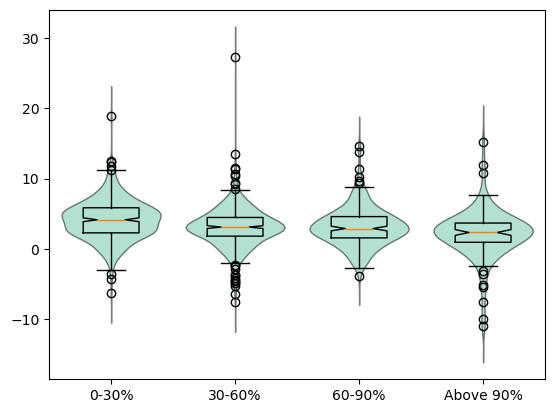

In [43]:
labels = ["0-30%","30-60%","60-90%","Above 90%"]
dat = [np.array(RR.dRGDP[RR.dgcat==x]) for x in labels]
print(sm.graphics.violinplot(dat, labels=labels))

Figure(640x480)


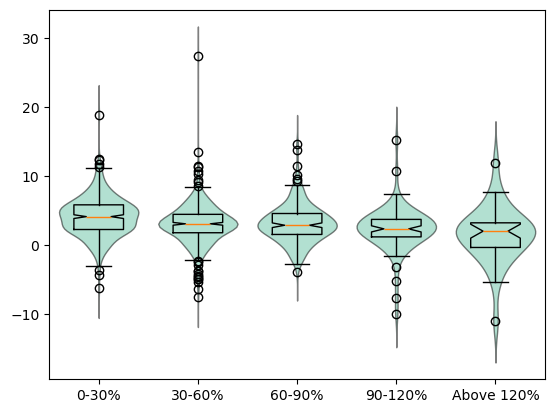

In [44]:
labels = ["0-30%","30-60%","60-90%","90-120%","Above 120%"]
dat = [np.array(RR.dRGDP[RR.dgcat2==x]) for x in labels]
print(sm.graphics.violinplot(dat, labels=labels))

## Country-Year average by debtgdp for more recent samples


In [45]:
years = range(1950, 2001, 10)
f = lambda x: (x, RR[RR.Year >= x].dRGDP.groupby(RR[RR.Year >= x].dgcat).mean())
[f(x) for x in years]

[(1950,
  dgcat
  0-30%        4.135295
  30-60%       2.980839
  60-90%       3.100982
  Above 90%    2.121852
  Name: dRGDP, dtype: float64),
 (1960,
  dgcat
  0-30%        3.895619
  30-60%       2.909601
  60-90%       2.779663
  Above 90%    2.074064
  Name: dRGDP, dtype: float64),
 (1970,
  dgcat
  0-30%        3.145224
  30-60%       2.644951
  60-90%       2.559289
  Above 90%    1.959229
  Name: dRGDP, dtype: float64),
 (1980,
  dgcat
  0-30%        2.541408
  30-60%       2.451346
  60-90%       2.435681
  Above 90%    1.959229
  Name: dRGDP, dtype: float64),
 (1990,
  dgcat
  0-30%        2.669334
  30-60%       2.403622
  60-90%       2.457587
  Above 90%    1.823201
  Name: dRGDP, dtype: float64),
 (2000,
  dgcat
  0-30%        2.747593
  30-60%       1.881735
  60-90%       1.290506
  Above 90%    1.745087
  Name: dRGDP, dtype: float64)]

# Lagged dependent variable

In [61]:
# Ensure lagged variable exists
if 'dRGDP_lag' not in RR.columns:
    RR = RR.sort_values(['Country', 'Year'])
    RR['dRGDP_lag'] = RR.groupby('Country')['dRGDP'].shift(1)

def new_func():
    y, X = patsy.dmatrices('dRGDP ~ dgcat + dRGDP_lag', data=RR[['dRGDP', 'dgcat', 'dRGDP_lag']].dropna())
    print(sm.OLS(y, X).fit().summary())

new_func()


                            OLS Regression Results                            
Dep. Variable:                  dRGDP   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     63.84
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           8.90e-49
Time:                        17:57:55   Log-Likelihood:                -2723.0
No. Observations:                1155   AIC:                             5456.
Df Residuals:                    1150   BIC:                             5481.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.5045      0

# Fixed effects

In [62]:
# Ensure lagged variable exists
if 'dRGDP_lag' not in RR.columns:
    # Create lagged variable using transform instead of apply to maintain proper indexing
    RR = RR.sort_values(['Country', 'Year'])  # Ensure proper sorting
    RR['dRGDP_lag'] = RR.groupby('Country')['dRGDP'].shift(1)

y,X = patsy.dmatrices('dRGDP ~ dgcat + dRGDP_lag + Country', data=RR[['dRGDP', 'dgcat', 'dRGDP_lag', 'Country']].dropna())
print(sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  dRGDP   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     11.89
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           1.84e-39
Time:                        17:57:58   Log-Likelihood:                -2713.7
No. Observations:                1155   AIC:                             5475.
Df Residuals:                    1131   BIC:                             5597.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2